### Working with Reanalysis Data

 We will use data from the NCEP Reanalysis website at 
 https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
 
 We are going to look at pressure level data. A full file will be 4D (time, level, lat, lon).

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import netCDF4

file='/projects/jiko1138/ATOC_3030/Oct_28/air.mon.mean_2000-2020.nc'                    
nc = netCDF4.Dataset(file)                

In [10]:
temps = nc.variables['air'][:, :, :, :]   #Reading in 4D datafile to numpy array
lats = nc.variables['lat'][:]             #reading in lats to numpy array
lons = nc.variables['lon'][:]             #reading in lons to numpy array
levs = nc.variables['level'][:]           #reading in levs to numpy array (this is more useful when using multi-level data :)
mnth = nc.variables['time'][:]            #reading in times to numpy array called mnth

In [11]:
#this code changes the netcdf time to a date time that is more plot friendly.

time = nc.variables['time'] # temperature variable as an object. This call is needed so the time units are read in

dtime = netCDF4.num2date(mnth[:],time.units)
print(dtime[0])  #what is the first month? The first index is 0 in Python and not 1!
print(dtime[12]) #check to see if this goes up a year
print(dtime[36]) # check to see if this goes up 3 years

2000-01-01 00:00:00
2001-01-01 00:00:00
2003-01-01 00:00:00


In [12]:
#what is the last year/month? [-1] is always the last data point
print(dtime[-1])

2020-01-01 00:00:00


In [13]:
#let's check on our single level. Note this could be used to see what order levels are in with multilevel data
print(levs)

[1000.]


In [14]:
#let's create a 3D file from the 4D file that has only 1 level

t1000=temps[:,0,:,:]
print(t1000.shape)

(241, 73, 144)


In [15]:
#let's create a mean map and a standard deviation map for 1000mb across all 241 times (axis=0)
#note that you could average across different axes for different applications
t1000_mean=np.mean(t1000,axis=0)
print('Mean shape is...')
print(t1000_mean.shape)

t1000_std=np.std(t1000,axis=0)
print('Std shape is...')
print(t1000_std.shape)

Mean shape is...
(73, 144)
Std shape is...
(73, 144)


In [16]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
print("Done")

Done


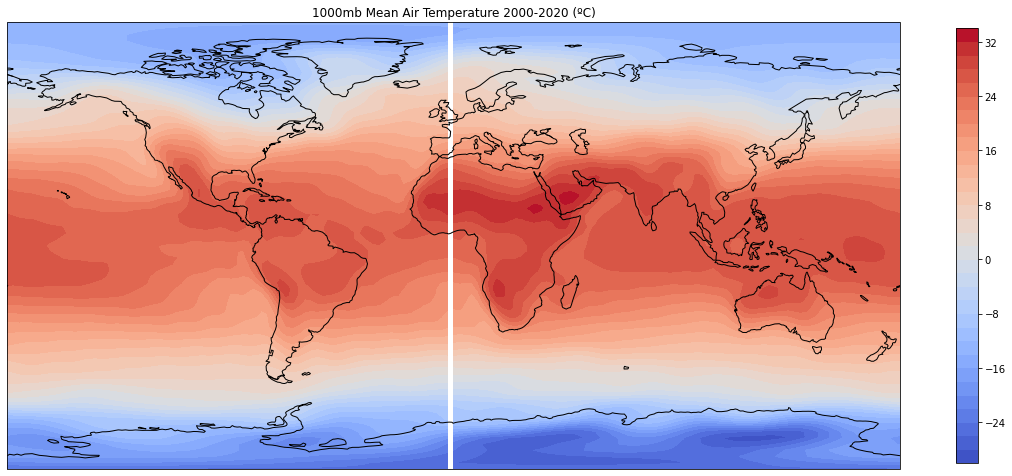

In [17]:
#this part may very well crash when first run. If so, click in this box and go to Runtime-->Run before. Once those are done run this box again.
#the coastlines command seems to cause issues for everyone. If needed, you can comment out (add a # before) the ax.coastlines command. 
#It is nice to have the coastlines shown though!

plt.figure(figsize=(20,10))                     #making figure size

ax = plt.axes(projection=ccrs.PlateCarree())    #setting projection (Cartopy is used here)


plt.contourf(lons, lats, t1000_mean, 40,
             transform=ccrs.PlateCarree(), cmap='coolwarm')   

plt.title('1000mb Mean Air Temperature 2000-2020 (ºC)')
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(orientation='vertical',shrink=0.8)

plt.show()

In [21]:
from cartopy.util import add_cyclic_point
print("Done")

Done


original dims = 
(73, 144)
(144,)
new wrapped dims = 
(73, 145)
(145,)


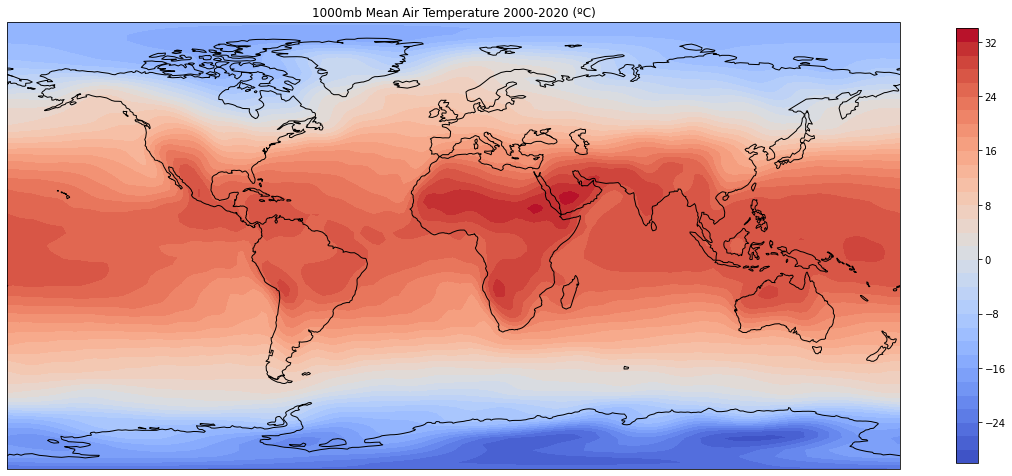

In [22]:
#often coders use the term 'dum' or dummy to make a variable that is just used as a means to an end
#here I am making a term tdum that is essentially a copy of t1000_mean but with one extra column of replicated data
#this will fill in the void in the middle of your map above

tdum, lons_w = add_cyclic_point(t1000_mean, coord=lons)  #this chunk wraps the data so no blank vertical line on map

print('original dims = ')
print(t1000_mean.shape)
print(lons.shape)
print('new wrapped dims = ')
print(tdum.shape)     #see that an extra meridional column was added
print(lons_w.shape)



plt.figure(figsize=(20,10))                     #making figure size

ax = plt.axes(projection=ccrs.PlateCarree())    #setting projection (Cartopy is used here)


plt.contourf(lons_w, lats, tdum, 40,
             transform=ccrs.PlateCarree(), cmap='coolwarm')   #the 40 number specifies # of data intervals
                                                              #cmap sets colormap 


plt.title('1000mb Mean Air Temperature 2000-2020 (ºC)')
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(orientation='vertical',shrink=0.8)

plt.show()

Cool! Let's plot the standard deviation now

original dims = 
(73, 144)
(144,)
new wrapped dims = 
(73, 145)
(145,)


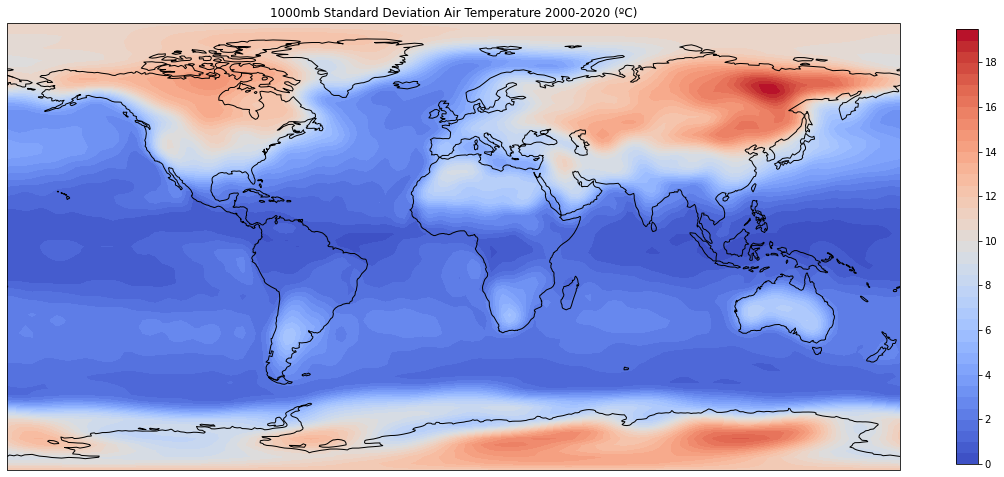

In [23]:
#Using the same dummy scheme but now with the standard deviation data

tdum, lons_w = add_cyclic_point(t1000_std, coord=lons)  #this chunk wraps the data so no blank vertical line on map

print('original dims = ')
print(t1000_std.shape)
print(lons.shape)
print('new wrapped dims = ')
print(tdum.shape)     #see that an extra meridional column was added
print(lons_w.shape)



plt.figure(figsize=(20,10))                     #making figure size

ax = plt.axes(projection=ccrs.PlateCarree())    #setting projection (Cartopy is used here)


plt.contourf(lons_w, lats, tdum, 40,
             transform=ccrs.PlateCarree(), cmap='coolwarm')   #the 40 number specifies # of data intervals
                                                              #cmap sets colormap 


plt.title('1000mb Standard Deviation Air Temperature 2000-2020 (ºC)')
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(orientation='vertical',shrink=0.8)

plt.show()

Interesting! Recall winds in the NH blow west to east in general. So the spots with the highest standard deviation are the most land locked with respect to that wind (i.e., Siberia and NE N. America). What you are seeing here really is the seasonal shift in temperature.



In [24]:
#what are the max and min values of the 1000mb means and stddev maps?
print('max mean  =')
print(t1000_mean.max())
print('min mean  =')
print(t1000_mean.min())
print('max std  =')
print(t1000_std.max())
print('min std  =')
print(t1000_std.min())

max mean  =
32.675926
min mean  =
-29.081291
max std  =
19.332794
min std  =
0.27874312


One thing to note though is that we took the standard deviation across all months in the data. To get a year-to-year standard deviation instead, you will have to make yearly average files. So let's do that.

In [25]:
#we have 20 complete years plus 1 month (Jan 2000... Jan 2020). We won't use Jan 2020 here to get 20 full years

dum=np.arange(20*73*144).reshape(20,73,144)   #making a variable with the dimensions I need (yrs,lats,lons). There are many ways to do this.

print(dum.shape)

nyears = np.arange(20)                  #create a variable of number of years that we will loop through
#print(nyears)
years=2000 + np.arange(20)              # creates a list of years (2000...2020)
#print(years)

for x in nyears:                                 #create a loop over nyears, with x going from 0 to 19 (nyears-1)
    print('x=',x)
    print('year=',years[x])
    print('month indices averaged=',12*x,12*x+11)                          #the month indices that are being averaged in next step
    
    temp=np.mean(t1000[12*x:12*x+11,:,:],axis=0)  #makes a 12 month avg map for each 12 month period. 
                                                  #The axis = 0 command means average over my month limits (12*x:12*x+12)
    dum[x,:,:]=temp                              #fills my preformed array with yearly average maps!
    
    
print('final shape=',dum.shape)

(20, 73, 144)
x= 0
year= 2000
month indices averaged= 0 11
x= 1
year= 2001
month indices averaged= 12 23
x= 2
year= 2002
month indices averaged= 24 35
x= 3
year= 2003
month indices averaged= 36 47
x= 4
year= 2004
month indices averaged= 48 59
x= 5
year= 2005
month indices averaged= 60 71
x= 6
year= 2006
month indices averaged= 72 83
x= 7
year= 2007
month indices averaged= 84 95
x= 8
year= 2008
month indices averaged= 96 107
x= 9
year= 2009
month indices averaged= 108 119
x= 10
year= 2010
month indices averaged= 120 131
x= 11
year= 2011
month indices averaged= 132 143
x= 12
year= 2012
month indices averaged= 144 155
x= 13
year= 2013
month indices averaged= 156 167
x= 14
year= 2014
month indices averaged= 168 179
x= 15
year= 2015
month indices averaged= 180 191
x= 16
year= 2016
month indices averaged= 192 203
x= 17
year= 2017
month indices averaged= 204 215
x= 18
year= 2018
month indices averaged= 216 227
x= 19
year= 2019
month indices averaged= 228 239
final shape= (20, 73, 144)


Info on Python loops ==> https://www.w3schools.com/python/python_for_loops.asp

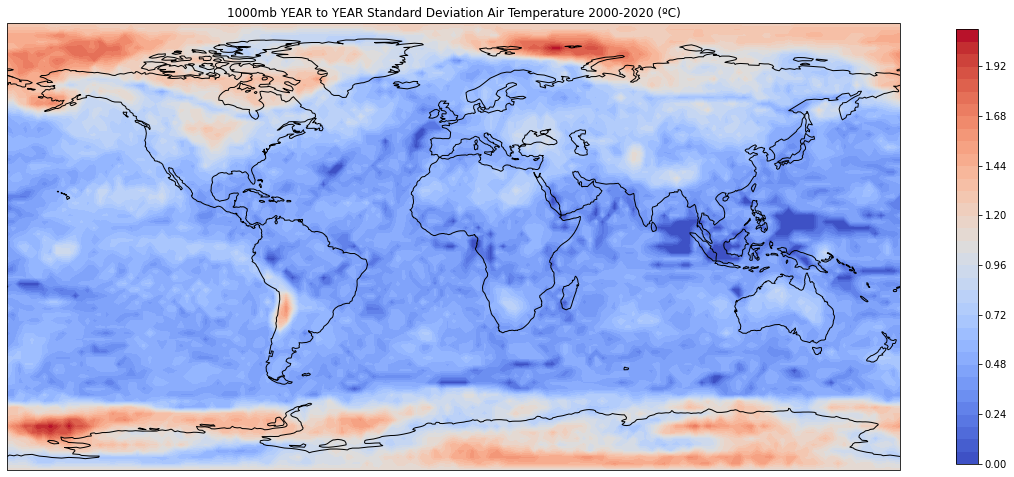

In [26]:
#let's make a stddev of dum and see how it went

t1000_stdyrs=np.std(dum, axis=0)

tdum2, lons_w = add_cyclic_point(t1000_stdyrs, coord=lons)  #this chunk wraps the data so no blank vertical line on map



plt.figure(figsize=(20,10))                     #making figure size

ax = plt.axes(projection=ccrs.PlateCarree())    #setting projection (Cartopy is used here)


plt.contourf(lons_w, lats, tdum2, 40,
             transform=ccrs.PlateCarree(), cmap='coolwarm')   #the 40 number specifies # of data intervals
                                                              #cmap sets colormap 


plt.title('1000mb YEAR to YEAR Standard Deviation Air Temperature 2000-2020 (ºC)')
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(orientation='vertical',shrink=0.8)

plt.show()

Quite a difference here! This takes out the monthly differences (which were huge for NH land areas) and instead gives you standard deviation based on year to year changes.

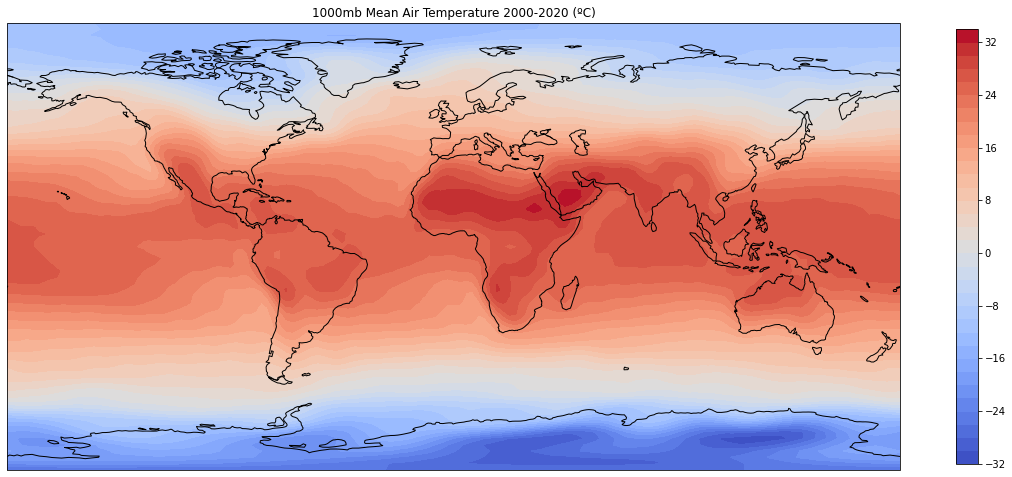

In [27]:
#let's make a mean of dum and see if it resembles the original mean for 1000mb (it should except for the month we ignored)

t1000_mndyrs=np.mean(dum, axis=0)

tdum3, lons_w = add_cyclic_point(t1000_mndyrs, coord=lons)  #this chunk wraps the data so no blank vertical line on map



plt.figure(figsize=(20,10))                     #making figure size

ax = plt.axes(projection=ccrs.PlateCarree())    #setting projection (Cartopy is used here)


plt.contourf(lons_w, lats, tdum3, 40,
             transform=ccrs.PlateCarree(), cmap='coolwarm')   #the 40 number specifies # of data intervals
                                                              #cmap sets colormap 


plt.title('1000mb Mean Air Temperature 2000-2020 (ºC)')
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(orientation='vertical',shrink=0.8)

plt.show()

The slight differences in this yearly averaged map vs. the original mean map that averaged over all months are due  to the fact that we left out 1/2020 for the yearly average map (because we did not have a full year there)

### My hope is that this code will enable you to use this reanalysis for ANY variable you may wish to look at!

Plot a maximum temperature map for the data. Recall that t1000 are the monthly temp maps with a shape of (241, 73, 144). The command to find the maximum value is np.amax and you use it just like we did with np.std and np.mean. You'll want to use axis=0 to search for the hottest month of the 20 years for each geographic region. Upload an image of your final map to the Activity 4 dropbox on Canvas by Fri. Oct 29th at 11:59pm for credit. 

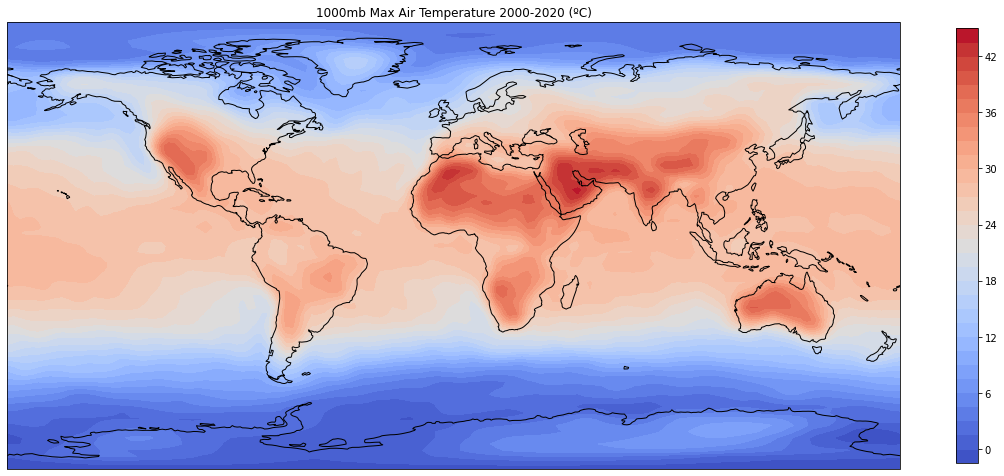

In [39]:
#let's make a mean of dum and see if it resembles the original mean for 1000mb (it should except for the month we ignored)

t1000_max=np.amax(t1000, axis=0)

tdum3, lons_w = add_cyclic_point(t1000_max, coord=lons)  #this chunk wraps the data so no blank vertical line on map


plt.figure(figsize=(20,10))                     #making figure size

ax = plt.axes(projection=ccrs.PlateCarree())    #setting projection (Cartopy is used here)


plt.contourf(lons_w, lats, tdum3, 40,
             transform=ccrs.PlateCarree(), cmap='coolwarm')   #the 40 number specifies # of data intervals
                                                              #cmap sets colormap 

plt.title('1000mb Max Air Temperature 2000-2020 (ºC)')
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(orientation='vertical',shrink=0.8)

plt.savefig("max_temp.png")

plt.show()